In [1]:
import pandas as pd
import numpy as np
import datetime

allData = pd.read_csv("./data/train.csv")

In [2]:
allData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data cleaning

In [3]:
sizeFeatures = [
    "MSSubClass", "Utilities", "BldgType", "TotalBsmtSF", "LowQualFinSF",
    "GrLivArea", "FullBath", "HalfBath", "TotRmsAbvGrd",
    "Fireplaces", "GarageArea"
]

locationFeatures = [
    "MSZoning", "LotFrontage", "LotArea", "Street",
    "LandContour", "LotConfig", "LandSlope", "Neighborhood", "Condition1",
    "YearBuilt", "YearRemodAdd", "Heating", "Functional", "PavedDrive"
]

targetFeature = ["SalePrice"]

selectedData = allData[sizeFeatures + locationFeatures + ["SalePrice"]].copy()
print(selectedData.columns)

#types are ordered from worst to best
utilitiesTypes = ["ELO", "NoSeWa", "NoSeWr", "AllPub"]
bldgTypes = ["TwnhsI", "TwnhsE", "Duplx", "2FmCon", "1Fam"]
mszoningTypes = ["A","I","C", "FV", "RH", "RM", "RL", "RP"]
streetTypes = ["Grvl", "Pave"]
landcontourTypes = ["Low", "Lvl", "Bnk", "HLS"]
lotconfigTypes = ["Inside", "Corner", "FR2", "FR3", "CulDSac"]
landslopeTypes = ["Sev", "Mod", "Gtl"]
neighborhoodTypes = []



numericalFeatures = ["MSSubClass", "TotalBsmtSF", "LowQualFinSF",
    "GrLivArea", "FullBath", "HalfBath", "TotRmsAbvGrd",
    "Fireplaces", "GarageArea", "LotFrontage", "LotArea", "GrLivArea"]



count = 0
for column in numericalFeatures:
    selectedData.fillna({column: 0}, inplace=True)


#for column in sizeFeatures + locationFeatures:
    
    #if selectedData[column].dtype != 'int64' and selectedData[column].dtype != 'float64':
       #selectedData[column].map(int)
    
print(selectedData.columns)
#add columns for class data 
selectedData = pd.get_dummies(selectedData) 
print(selectedData["SalePrice"])


Index(['MSSubClass', 'Utilities', 'BldgType', 'TotalBsmtSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageArea', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'YearBuilt', 'YearRemodAdd', 'Heating', 'Functional', 'PavedDrive',
       'SalePrice'],
      dtype='object')
Index(['MSSubClass', 'Utilities', 'BldgType', 'TotalBsmtSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageArea', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'YearBuilt', 'YearRemodAdd', 'Heating', 'Functional', 'PavedDrive',
       'SalePrice'],
      dtype='object')
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Nam

# Model training/evaluation

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import mean_squared_error
import tensorflow.keras.backend as K


import numpy as np

X = selectedData.drop(columns=targetFeature)
y = selectedData[targetFeature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(150, input_shape=(X_train_scaled.shape[1],)))
model.add(Activation('relu'))               
model.add(Dense(1))       

model.summary()

optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])

history = model.fit(X_train_scaled, y_train, validation_split=1/6, epochs=100, batch_size=32)

# Evaluate the model
mse, _ = model.evaluate(X_test_scaled, y_test)

# Calculate RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 150)               13500     
                                                                 
 activation_9 (Activation)   (None, 150)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 151       
                                                                 
Total params: 13651 (53.32 KB)
Trainable params: 13651 (53.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 1s 7ms/step - loss: 38361505792.0000 - mse: 38361505792.0000 - val_loss: 38593921024.0000 - val_mse: 38593921024.0000
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 38314237952.0000 - mse: 38314237952.00

# Model accuracy visualization 
We plot the predicted values against the true values.

16/16 [==============================] - 0s 1ms/step


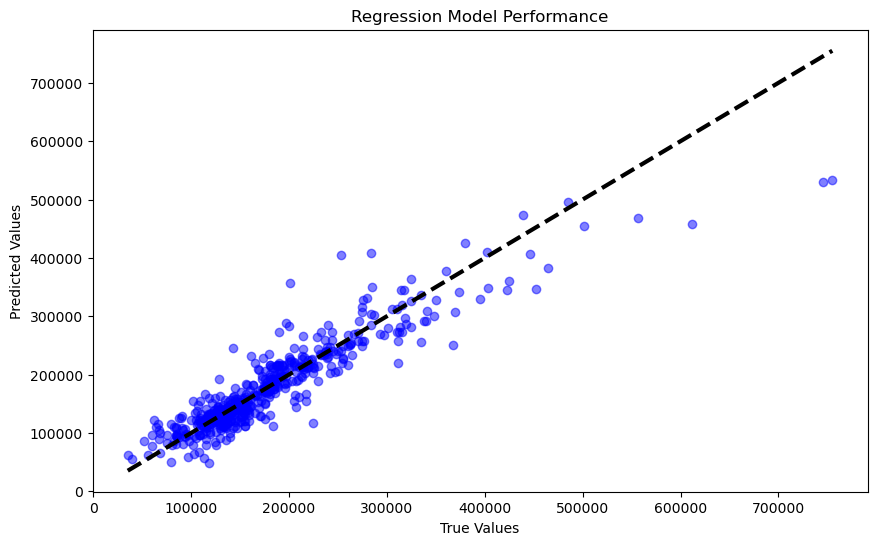

In [10]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test_scaled).flatten()

plt.figure(figsize=(10, 6))
plt.plot(y_test, predictions, 'bo', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)  # Diagonal line
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Regression Model Performance')
plt.show()